In [1]:
from IPython.core.display import HTML

def css_styling():
    styles = open("../Data/www/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [1]:
import glob
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pylab import imread

In [2]:
%matplotlib inline

#Project

For this project, we will download images of cells on plates from [Cell Image Library](http://www.cellimagelibrary.org/pages/project_20269) and write code to identify the contour of the cells, and then measure how well our code performs.

###  First step: Upload data

Fill in details

### Second step: Identify cells

Fill in details

### Third step: Compare identified cells to curated results

Fill in details



<class 'matplotlib.axes._subplots.AxesSubplot'>


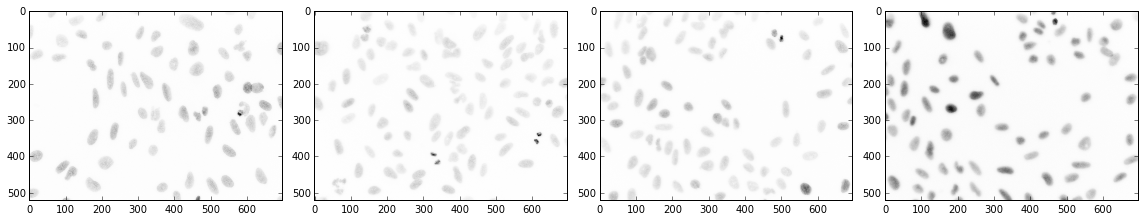

type is: <class 'numpy.ndarray'>


In [35]:
paths = glob.glob('../Data/Cell_images/BBBC022_v1_images_20585w1/*')

fig, plots = plt.subplots(figsize=(16, 8), nrows=1, ncols=4)
print(type(plots[0]))

images = []
for i, file in enumerate(paths):
    images.append(imread(file))
    if i < 4:
        plots[i].imshow(images[i][:,:], cmap=cm.Greys)

plt.tight_layout()
plt.show()
    
print('type is:', type(images[-1]))



In [13]:
for image in images[:3]:
    print('Max of the image is {0}. Min of image is {1}.'.format(image.max(), image.min()) )
    print('Shape of image is {0}. \n'.format(image.shape) )

Max of the image is 2214. Min of image is 140.
Shape of image is (520, 696). 

Max of the image is 3042. Min of image is 141.
Shape of image is (520, 696). 

Max of the image is 2507. Min of image is 140.
Shape of image is (520, 696). 



243.566517462
267.083482538
253.812160146
236.998590849
236.096278183
279.794559571
235.593006742
195.093296861
234.236480438
303.364572281


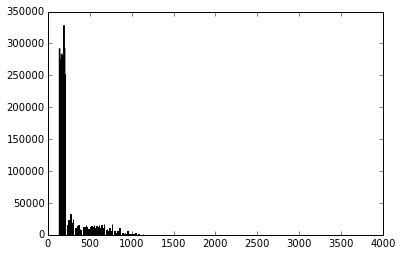

In [14]:
values = []
for image in images:
    values.append(np.reshape(image, -1))    
    print(values[-1].mean())
    
plt.hist(values, bins = 40)
plt.show()

In [15]:
# Remove values greater than 3 times the mean

for i, value in enumerate(values):
    mean = value.mean()
    values[i] = [x if x<= 3*mean else 3*mean for x in value ]
    

10


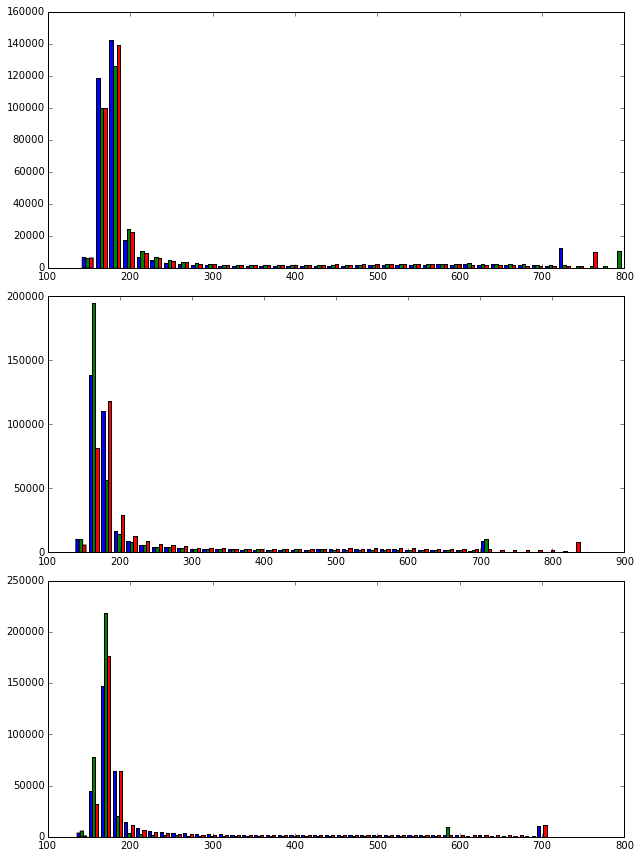

In [18]:
print(len(values))
fig, plots = plt.subplots(figsize=(9, 12), nrows=3, ncols=1)
k = 0
for i in range(0, len(values)-1, 3):
    plots[k].hist(values[i:i+3], bins = 40)
    k += 1

plt.tight_layout()
plt.show()


We can define a threshold a set all values below them to zero and all above equal to 1...

In [43]:
factor = 1.

masks = []
for i, image in enumerate(images):
    for_peak = np.array( [x for x in values[i] if x< 230] )
    mean = for_peak.mean()
    st_dev = np.std(for_peak)
    masks.append([])
    for j in range(len(image)):
        masks[-1].append([])
        for l in range(len(image[j])):
            #print(i, j, images[i][j][l])
            if images[i][j][l] < mean + factor * st_dev:
                masks[-1][-1].append(0)
            else:
                masks[-1][-1].append(1000)

masks = np.array(masks)

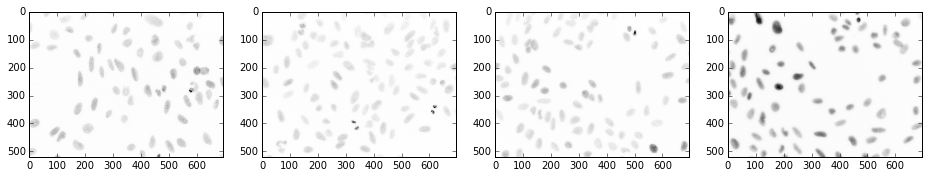

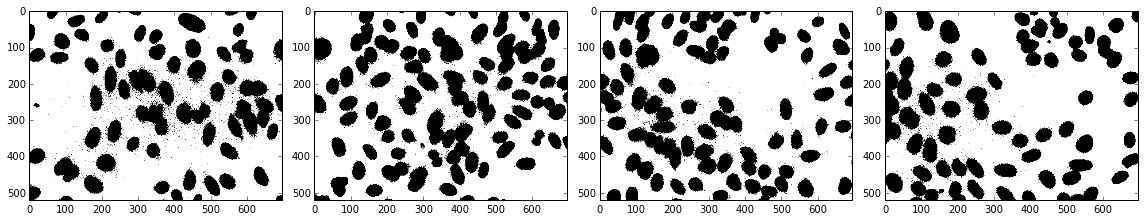

In [44]:
fig, plots = plt.subplots(figsize=(16, 8), nrows=1, ncols=4)
for i, image in enumerate(images[:4]):
    plots[i].imshow(image[:,:], cmap=cm.Greys)

fig, plotsb = plt.subplots(figsize=(16, 8), nrows=1, ncols=4)
for i, mask in enumerate(masks[:4]):
    plotsb[i].imshow(mask[:,:], cmap=cm.Greys)
    
plt.tight_layout()
plt.show()